# Исследовательский анализ рынка общественного питания Москвы

## Цели и задачи проекта

<font color='#777778'>Основные задачи и цели:

1. Провести исследовательский анализ рынка общественного питания Москвы.
2. Определить тип заведения:
 - Исследовать варианты: кафе, ресторан или бар;
 - Проанализировать особенности каждого формата.
3. Выявить оптимальные параметры будущего заведения:
 - Определить местоположение;
 - Сформировать меню;
 - Установить ценовой диапазон.
4. Использовать доступные данные:
 - Проанализировать датасет заведений общепита Москвы;
 - Изучить информацию из сервисов Яндекс Карты и Яндекс Бизнес;
 - Учесть, что данные собраны летом 2022 года.
5. Предоставить результаты анализа для принятия решения инвесторами.

Важно отметить, что информация в Яндекс Бизнес носит справочный характер и могла быть добавлена пользователями, поэтому при анализе следует учитывать возможную субъективность данных.</font>

### Описание данных

<font color='#777778'>
 
    
    
Файл `/datasets/rest_info.csv` содержит информацию о заведениях общественного питания:
- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
  - 0 — заведение не является сетевым;
  - 1 — заведение является сетевым.
- `seats` — количество посадочных мест.

Файл `/datasets/rest_price.csv` содержит информацию о среднем чеке в заведениях общественного питания:
- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
   - «Средний счёт: 1000–1500 ₽»;
   - «Цена чашки капучино: 130–220 ₽»;
   - «Цена бокала пива: 400–600 ₽», и так далее;
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
   - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
   - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
   - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца - avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
   - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
   - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
   - Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.
</font>

### Основные шаги

<font color='#777778'> 
    
      
Основные шаги по выполнению проекта:


1. Знакомство с данными
   - Анализ общей информации;
   - Проверка объема данных;
   - Объединение датасетов. 
        
2. Предобработка данных
   - Проверка и преобразование типов данных;
   - Работа с пропущенными значениями;
   - Анализ причин появления пропусков;
   - Выбор стратегии обработки пропусков (замена, удаление или сохранение);
   - Явные дубликаты и неявные дубликаты (например, по названию и адресу);
   - Нормализация текстовых данных;
   - Создание нового столбца "is_24_7", который указывает маркер заведения с режимом работы 24/7. 
        
3. Исследовательский анализ 
    
   - Анализ категорий заведений;
   - Анализ административных районов;
   - Исследование сетевых заведений;
   - Анализ посадочных мест;
   - Исследование рейтингов;
   - Анализ популярных сетей;
   - Исследование среднего чека.
    
4. Выводы и рекомендации.
    
</font>

---

## Загрузка данных и знакомство с ними


### Знакомство с данными


Начнём с загрузки библиотек и датасетов `/datasets/rest_info.csv` и `/datasets/rest_price.csv`. Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik_matrix для построения матрицы корреляции. Данные датасетов сохраним в двух переменных: `rest_df` и `price_df`.

In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

Познакомимся с данными датасета `/datasets/rest_info.cs` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [2]:
rest_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
rest_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [3]:
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Датасет `/datasets/rest_info.csv` содержит 9 столбцов и 8 406 строк, в которых представлена информация о заведениях общественного питания Москвы.

После первичного анализа данных можно сделать следующие выводы:
- Тип данных соответствует заданной структуре полей, кроме поля 'seats', значения в данном столбце можно преобразовать к типу int.
- Названия столбцов приведены к единому типу snake_case и не требуют дополнительной обработки.
- id, идентификатор имеет структуру смешанного типа, содержит числа и строковые значения, поэтому тип object соответствует данному полю.
- Поля `chain` и `seats` представлены числами в формате int64 и float64. Поле `chain` показывает, является ли заведение сетевым и содержит значения 1 или 0, поле `seats` показывает количество посадочных мест и имеет целочисленные значения — размерность этих данных можно оптимизировать.
- Пропуски содержатся в столбцах `hours` и `seats`. Однако следует проверить и другие столбцы: в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.
- Можно предположить, что неочивидные дубли могут встретиться в полях с типом 'object', из-за различной интерпретации данных о заведениях, либо некорректном заполнении значения полей,проверим эту теорию дальше в расчетах.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Теперь познакомимся с данными датасета `/datasets/rest_price.csv`.

In [4]:
price_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')
price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [5]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Датасет `/datasets/rest_price.csv` содержит 5 столбцов и 4 058 строк, в которых представлена информация о среднем чеке в заведениях общественного питания.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов приведены к единому типу snake_case и не требуют дополнительной обработки.
- id, идентификатор имеет структуру смешанного типа, содержит числа и строковые значения, поэтому тип object соответствует данному полю.
- Поля `middle_avg_bill` и `middle_coffee_cup` представлены в числовом формате float64, размерность этих данных можно оптимизировать.
- Пропуски содержатся в столбцах `price`, `avg_bill`, `middle_avg_bill`, `middle_coffee_cup`.
- Можно предположить, что неочивидные дубли могут встретиться в поле `avg_bill`, из-за различной интерпретации данных о среднем чеке.
- Значения в столбцах соответствуют описанию.


---

**Промежуточный вывод**


Первичное знакомство показывает, что значения в датасетах соответствуют описанию, названия полей приведены к одному стилю snake_case, необходимо привести некоторые поля к оптимальному типу, в соответствии структуре значений в этих полях.

Датасет `/datasets/rest_price.csv` сождержит в два раза меньше строк, относительно датасета `/datasets/rest_info.csv`,  это может быть связано с тем, что данный датасет собран на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года, из-за отсутствия дат, когда была опубликована та или иная информации о точках общественного питания, по этой причине мы не можем отфильтровать данные, например по конкретному году, чтобы анализировать срез с более полным набором данных.

### Подготовка единого датафрейма


In [6]:
#Объединяем данные двух датасетов в один c помощью left

df = pd.merge(rest_df, price_df, on = 'id', how = 'left')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


Не смотря на то, что в датафрейме `price_df` у нас в два раза меньше данных, в первом датасете у нас находится важная информация о рейтингах, времени работе заведений, а также сам список заведений, которые мы не можем отбросить из анализа.

## Предобработка данных


### Проверка и преобразование типов данных

In [7]:
#Выведем информацию о нашем датафрейме и посмотрим на типы данных
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


Поля, которые содержат численные данные можно оптимизировать, понизив их разрядность.

In [8]:
#Для оптимизации будем использовать метод `pd.to_numeric` с аргументом `downcast='integer'`
for column in ['chain','seats','middle_avg_bill', 'middle_coffee_cup', 'rating']:
    df[column] = pd.to_numeric(df[column],
                                    downcast='integer')
    df[column] = pd.to_numeric(df[column],
                                    downcast='float')



In [9]:
#Выведем еще раз информацию о нашем датафрейме, чтобы убедиться в успешном оптимизации типов
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float32
 7   chain              8406 non-null   int8   
 8   seats              4795 non-null   float32
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float32
 12  middle_coffee_cup  535 non-null    float32
dtypes: float32(4), int8(1), object(8)
memory usage: 730.6+ KB


Типы данных были успешно оптимизированы с понижением размерности целочисленных данных.

---

### Проверка наличия пропущенных значений

Проверим наличие пропусков в наших столбцах

In [10]:
#Посчитаем долю пропущенных значений в столбцах, отсортировав по убыванию доли
share_null = (df.isna().mean() *100).sort_values(ascending = False)
share_null

middle_coffee_cup    93.635498
middle_avg_bill      62.538663
price                60.563883
avg_bill             54.603854
seats                42.957411
hours                 6.376398
id                    0.000000
name                  0.000000
category              0.000000
address               0.000000
district              0.000000
rating                0.000000
chain                 0.000000
dtype: float64

В датафрейме `df` обнаружено большое кол-во пропусков в столбцах `seats`, `avg_bill`, `price`, `middle_avg_bill`, `middle_coffee_cup`, кол-во пропусков достаточно большое, чтобы их просто удалить или заменить на среднее значение, пропуски в данных столбцах оставим без изменения. В столбце `hours` пропуски составляют около 6,4%, что является допустимым для удаления таких пропусков, либо на замену на какое-либо значение. В данном случае, заменим пропуски на значение `Нет данных о режиме работы`.

In [11]:
#Замена пустых значений в поле hours
df['hours'].fillna('Нет данных о режиме работы', inplace=True)
#Снова выведем долю пропусков по столбцам
(df.isna().mean() *100).sort_values(ascending = False)

middle_coffee_cup    93.635498
middle_avg_bill      62.538663
price                60.563883
avg_bill             54.603854
seats                42.957411
id                    0.000000
name                  0.000000
category              0.000000
address               0.000000
district              0.000000
hours                 0.000000
rating                0.000000
chain                 0.000000
dtype: float64

Пропуски преобразовали, теперь перейдем к работе с дублями.

### Проверка на наличие явных и неявных дубликатов

In [12]:
#Преобразуем значения в поле name к верхнему регистру, чтобы исключить дубли из-за разного написания одинаковых по значению слов
df['name'] = df['name'].str.upper()

In [13]:
#Преобразуем значения в поле address к нижнем регистру
df['address'] = df['address'].str.lower()

In [14]:
# Проверяем наличие полных дубликатов в датафрейме
df.duplicated().sum()

0

Полных дубликатов в датафрейме не выявлено!

In [15]:
# Проверяем уникальные значения в категориальных столбцах
for column in ['name', 'category', 'address', 'district', 'price', 'avg_bill']:
    print(f'Уникальные значения в столбце {column}:')
    print(df[column].sort_values().unique())
    print()

Уникальные значения в столбце name:
['#КЕШБЭККАФЕ' '+39 PIZZERIA MOZZARELLA BAR' '1 ЭТАЖ' ... 'ЯСМИН' 'ЯСНО'
 'ЯУЗА']

Уникальные значения в столбце category:
['бар,паб' 'булочная' 'быстрое питание' 'кафе' 'кофейня' 'пиццерия'
 'ресторан' 'столовая']

Уникальные значения в столбце address:
['москва, 1-й автозаводский проезд, 5'
 'москва, 1-й балтийский переулок, 3/25'
 'москва, 1-й варшавский проезд, 1ас9' ...
 'москва, яузский бульвар, 11, стр. 1' 'москва, яузский бульвар, 14/8'
 'москва, № 7']

Уникальные значения в столбце district:
['Восточный административный округ' 'Западный административный округ'
 'Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Центральный административный округ'
 'Юго-Восточный административный округ'
 'Юго-Западный административный округ' 'Южный административный округ']

Уникальные значения в столбце price:
['высокие' 'выше среднего' 'низкие' 'средние' nan]

Уникальные значения в столбце

In [16]:
#Проверим, кол-во повторяющихся значений в полях 'name' и 'address'
dubl_name = df['name'].duplicated().sum()
dubl_address = df['address'].duplicated().sum()
print (f'Кол-во повторяющихся значений в поле name: {dubl_name}, кол-во повторяющихся значений в поле address: {dubl_address}')

Кол-во повторяющихся значений в поле name: 2894, кол-во повторяющихся значений в поле address: 2654


Необходимо проверить, являются ли повторы в полях `name` и `adress` нормальным явлением. Посчитаем кол-во строк, где значение в полях `name`, `category`, `address` совпадают и значение в поле `chain` равно `0`, что соответствует тому, что заведение не является сетевым.

In [17]:
duplicates = df[df.duplicated(subset=['name', 'address'], keep=False)] 
#пишу для себя, чтобы запомнить, что keep=False позволяет увидеть все дубликаты, включая первое вхождение
duplicates.duplicated().sum()

0

Строк-дублей по следующему условию не обнаружено!

### Добавление нового поля

Разметим заведения, которые работают ежедневно и круглосуточно.

In [18]:
uniq_hours = df['hours'].unique()
uniq_hours

array(['ежедневно, 10:00–22:00',
       'пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00–02:00',
       'ежедневно, 09:00–22:00', ...,
       'пн-пт 08:30–21:30; сб,вс 09:00–21:30',
       'пн-чт 13:00–22:00; пт,сб 13:00–22:30; вс 13:00–22:00',
       'пн-сб 10:30–21:30'], dtype=object)

In [19]:
#Добавим поле 'is_24_7', которое показывает, работает ли заведение ежедневно и круглосуточно
def work(hours):
    if 'круглосуточно' in hours:
        return True
    elif hours == 'круглосуточно':
        return True
    elif '00:00–24:00' in hours:
        return True
    else:
        return False

# Применение функции к каждому значению столбца
df['is_24_7'] = df['hours'].apply(work)
df

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WOWФЛИ,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN,False
1,045780ada3474c57a2112e505d74b633,ЧЕТЫРЕ КОМНАТЫ,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,False
2,1070b6b59144425896c65889347fcff6,ХАЗРИ,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN,False
3,03ac7cd772104f65b58b349dc59f03ee,DORMOUSE COFFEE SHOP,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,False
4,a163aada139c4c7f87b0b1c0b466a50f,ИЛЬ МАРКО,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,0342ad1a45ed41ba89dcba246a8267e5,СУШИ МАНИЯ,кафе,"москва, профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86.0,NaN,NaN,NaN,NaN,False
8402,ee6bb7c3650e47bd8186fca08eda1091,МИСЛАВНЕС,кафе,"москва, пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150.0,NaN,NaN,NaN,NaN,False
8403,62e8c64d4c89467aba608e39ef87616b,САМОВАР,кафе,"москва, люблинская улица, 112а, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150.0,NaN,Средний счёт:от 150 ₽,150.0,NaN,True
8404,06a0db5ecd4842d48cd6350aa923e297,ЧАЙХАНА SABR,кафе,"москва, люблинская улица, 112а, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150.0,NaN,NaN,NaN,NaN,True


In [20]:
#Посчитаем кол-во заведений, которые работают ежедневно и круглосуточно
sum_hours_24_7 = df['is_24_7'].sum()
sum_hours_24_7

772

772 заведений, которые работают круглосуточно 7 дней в неделю!

---

### Промежуточный вывод


Обработка пропущенных значений:
- В столбцах seats, avg_bill, price, middle_avg_bill, middle_coffee_cup обнаружено значительное количество пропусков, которые решено оставить без изменений
- В столбце hours пропуски составляют 6,4%, принято решение заменить их на значение “Нет данных о режиме работы”

Работа с дубликатами:
- Полных дубликатов в датафрейме не обнаружено
- Выявлено 2894 повторяющихся значения в поле name и 2654 в поле address
- После проверки на дубликаты по условиям (совпадение name, category, address при условии chain=0) дублирующихся строк не обнаружено

Дополнительная разметка:
- Выявлено 730 заведений, работающих круглосуточно 7 дней в неделю

Таким образом, данные прошли первичную очистку и подготовку. Обнаруженные пропуски в большинстве столбцов оставлены для дальнейшего анализа, так как их количество является существенным. Дубликаты не обнаружены, что говорит о чистоте данных. Выделение круглосуточных заведений добавляет дополнительную полезную информацию для дальнейшего анализа.

## Исследовательский анализ данных
Проведем исследовательский анализ исходных данных.


---

### Исследуем количество объектов общественного питания по каждой категории. 

In [21]:
# Выведем названия категорий, которые есть в датафрейме
category = df['category'].unique()
category

array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

Датафрейм содержит 8 категорий.

In [22]:
#Посчитаем кол-во заведений в каждой категории
cat_group = df.groupby('category')['id'].count().sort_values(ascending = False)
cat_group

category
кафе               2378
ресторан           2043
кофейня            1413
бар,паб             765
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: id, dtype: int64

In [23]:
#Также тоже можно посчитать кол-во заведений следующим способом
df['category'].value_counts()

кафе               2378
ресторан           2043
кофейня            1413
бар,паб             765
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

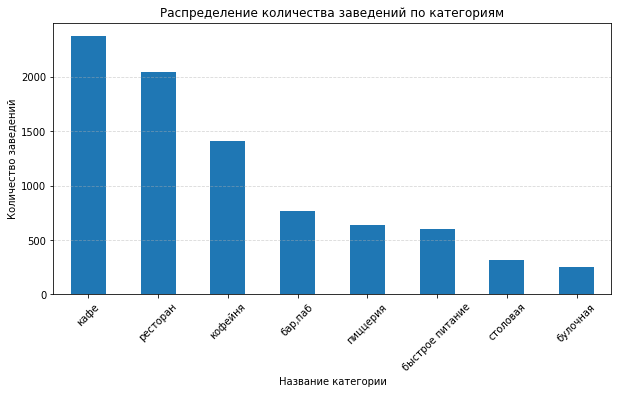

In [24]:
# Создаём фигуру графика по определенным значениям ширины и высоты
plt.figure(figsize=(10, 5))
# Построим столбчатую диаграмму
cat_group.plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=45, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение количества заведений по категориям'
)
# Настраиваем оформление графика
plt.xlabel('Название категории')
plt.ylabel('Количество заведений')
# Добавляем только вертикальные линии сетки
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.grid(axis='x', b=False)  # Отключаем горизонтальные линии






**ТОП-5 категории по кол-ву заведений:** 
- Кафе - 2378 заведений;
- Ресторан - 2043 заведения;
- Кофейня - 1413 заведений;
- Бар,паб - 765 заведений;
- Пиццерия - 633 заведения.

---

### Исследуем распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы.

Исследуем распределение количества заведений по административным районам Москвы

In [25]:
#Посчитаем кол-во заведений по административным округам
dist_group_cnt = df['district'].value_counts().sort_values(ascending = False)
dist_group_cnt

Центральный административный округ         2242
Северный административный округ             900
Южный административный округ                892
Северо-Восточный административный округ     891
Западный административный округ             851
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64

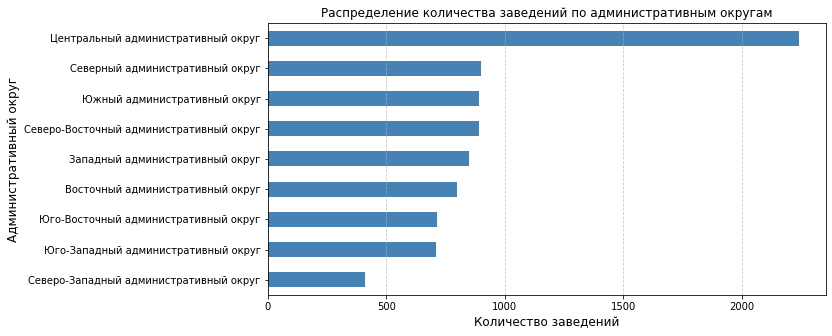

In [26]:
#Посчитаем кол-во заведений по административным округам
dist_group_cnt = df['district'].value_counts().sort_values(ascending = True)

# Создаем горизонтальную столбчатую диаграмму
dist_group_cnt.plot(
    kind='barh',  # horizontal bar chart
    rot=0,  # Отключаем поворот подписей
    legend=False,
    figsize=(10, 5),
    color='steelblue',
        title='Распределение количества заведений по административным округам'
)

# Настраиваем оси
plt.xlabel('Количество заведений', fontsize=12)
plt.ylabel('Административный округ', fontsize=12)

# Добавляем вертикальные линии сетки
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', b=False)  # Отключаем горизонтальные линии


# Показываем график
plt.show()

Как и ожидалось,в Центральном административном округе находится наибольшее количество заведений - 2242, далее идут Северный и Южный, кол-во заведений в этих округах составляет 900 и 892.

Далее подробно изучим Центральный административный округ, а именно, какие категории заведений в нем наиболее популярны.

In [27]:
#Фильруем наш датафрейм по значению "ЦАО" и сохраняем в новый датафрейм df_centr
df_centr = df[df['district'] == 'Центральный административный округ'].copy()
#Считаем кол-во заведений и группируем по категориям
cat_group_centr = df_centr.groupby('category')['id'].count().sort_values(ascending = False)
cat_group_centr

category
ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: id, dtype: int64

Топ-3 категории по количеству заведений в ЦАО: рестораны - 670 заведений, кафе - 464 заведения, кофейни - 428 заведений.

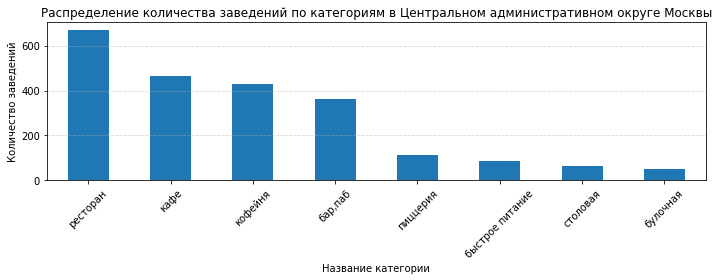

In [28]:
# Создаём фигуру графика по определенным значениям ширины и высоты
plt.figure(figsize=(10, 4))
# Создаем столбчатую диаграмму 
cat_group_centr.plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=45, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
                
               title=f'Распределение количества заведений по категориям в Центральном административном округе Москвы'
)
# Настраиваем оформление графика
plt.xlabel('Название категории')
plt.ylabel('Количество заведений')
# Добавляем только вертикальные линии сетки
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.grid(axis='x', b=False)  # Отключаем горизонтальные линии


# Улучшаем читаемость графика
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()

plt.show()

**Промежуточный вывод:**
- Наибольшее количество заведений Москвы находится в Центральном административном округе, где преобладающее большинство заведений - это рестораны, кафе и кофейни.

---

### Изучим соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. 
Ответим на следующие вопросы:
- Каких заведений больше — сетевых или несетевых? 
- Какие категории заведений чаще являются сетевыми?

Посчитаем соотношение сетевых заведений от общего кол-ва: 0 - заведение не яляется сетевым, 1 - является сетевым.

In [29]:
# Проверяем распределение данных по значениям в столбце
for column in ['chain']:
    print(f'Распределение данных по значениям столбца {column}:')
    print(df[column].value_counts(normalize=True))
    print()

Распределение данных по значениям столбца chain:
0    0.618725
1    0.381275
Name: chain, dtype: float64



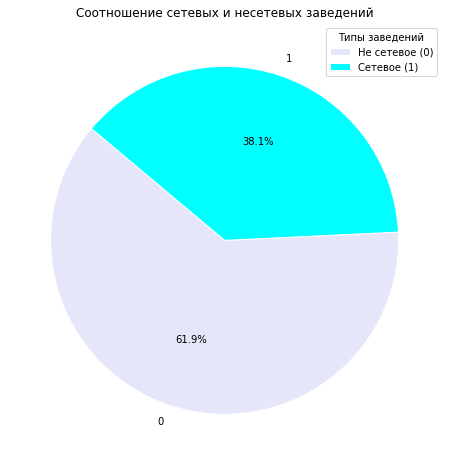

In [30]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(8, 8))  # Делаем квадрат для правильной круговой диаграммы

# Получаем данные для диаграммы
chain_data = df['chain'].value_counts(normalize=True)

# Строим круговую диаграмму
plt.pie(
    chain_data.values,  # Значения для секторов
    labels=chain_data.index,  # Подписи секторов
    autopct='%1.1f%%',  # Отображение процентов с одним знаком после запятой
    startangle=140,  # Начинаем с определенного угла для лучшей читаемости
    wedgeprops={'edgecolor': 'white', 'linewidth': 1},  # Добавляем белые края
    colors=['#E6E6FA', '#00FFFF']  # Задаём цвета секторов
)

# Добавляем заголовок
plt.title('Соотношение сетевых и несетевых заведений')

# Добавляем легенду
plt.legend(
    title='Типы заведений',
    labels=['Не сетевое (0)', 'Сетевое (1)'],
    loc='best'
)

# Выводим график
plt.show()

38% заведений являются сетевыми!

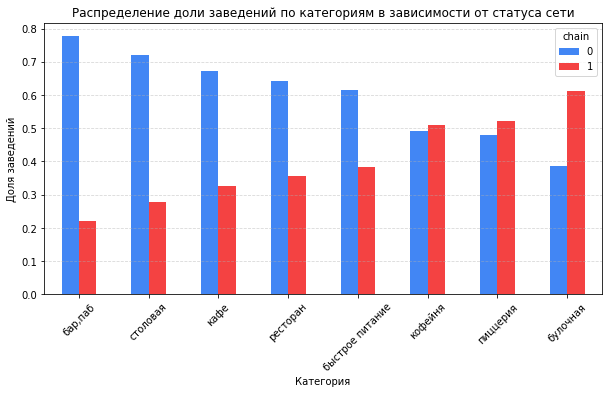

In [31]:
# Построим график столбчатой диаграммы и найдем количество заведений по категориям
cat_cnt_chain = df.groupby('category')['chain'].value_counts().unstack(fill_value=0)

# Преобразуем в доли
cat_pct_chain = cat_cnt_chain.div(cat_cnt_chain.sum(axis=1), axis=0)

# Сортируем по убыванию (по первой колонке)
cat_pct_chain = cat_pct_chain.sort_values(by=cat_pct_chain.columns[0], ascending=False)

# Строим график
cat_pct_chain.plot(kind='bar',
                   title='Распределение доли заведений по категориям в зависимости от статуса сети',
                   legend=True,
                   ylabel='Доля заведений',
                   xlabel='Категория',
                   rot=45,
                   figsize=(10, 5),
                   color=['#4286f4', '#f44242'])

# Добавляем сетку
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.grid(axis='x', b=False)

# Выводим график
plt.show()

**Промежуточный вывод:**
- 38% всех заведений являются сетевыми
- Среди кофеен, пиццерий и булочных преобладают именно сетевые заведения

---

### Исследуем количество посадочных мест в заведениях. 
Ответим на следующие вопросы:
- Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? 
- Приведем для каждой категории заведений наиболее типичное для него количество посадочных мест.

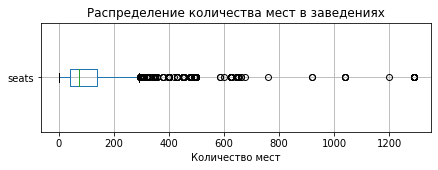

In [32]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце balance
df.boxplot(column='seats', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение количества мест в заведениях')
plt.xlabel('Количество мест')

# Выводим график
plt.show()

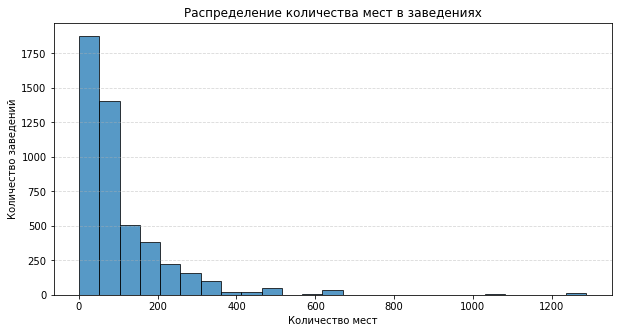

In [33]:
# Строим гистограмму с помощью pandas
df['seats'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=25, # Устанавливаем количество корзин - всего 25
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
                figsize=(10, 5)
)

# Настраиваем оформление графика
plt.title('Распределение количества мест в заведениях')
plt.xlabel('Количество мест')
plt.ylabel('Количество заведений')

# Добавляем только вертикальные линии сетки
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.grid(axis='x', b=False)  # Отключаем горизонтальные линии

# Выводим график
plt.show()

Видим, что данные в стобце `seats` имеют аномальные значения, диаграмма распределения количества мест показывает большой разброс данных, сложно представить, что может быть за ресторан или кафе, где более 1200 мест, тем более как обслуживать такие заведения.

Посмотрим детальней, единичны ли случаи, где количество посадочных мест более 350.

In [34]:
# Фильтруем данные и получаем распределение
filtered_seats = df.loc[df['seats'] >= 350]
seat_distribution = filtered_seats['seats'].value_counts().sort_index(ascending=False)

# Выводим информацию
print("Распределение мест (350 и выше):")
print(seat_distribution)

Распределение мест (350 и выше):
1288.0    11
1200.0     1
1040.0     4
920.0      2
760.0      1
675.0      1
660.0      2
650.0      6
644.0      2
625.0     23
600.0      1
585.0      2
500.0     21
495.0      6
491.0      2
481.0      2
480.0     13
478.0      4
455.0      4
450.0      6
430.0      1
428.0      5
420.0      1
400.0     11
398.0      2
380.0      4
356.0      3
350.0     56
Name: seats, dtype: int64


In [35]:
df_r = df[df['seats'] == 1288]
df_r

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
6518,fbf22d98b62a47fbb2a71be3545f16b2,DELONIXCAFE,ресторан,"москва, проспект вернадского, 94, корп. 1",Западный административный округ,"ежедневно, круглосуточно",4.1,0,1288.0,высокие,Средний счёт:1500–2000 ₽,1750.0,NaN,True
6524,c93d20f53072495c9cf2e489914cb8a5,ЯН ПРИМУС,ресторан,"москва, проспект вернадского, 121, корп. 1",Западный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–02:00; вс 12:00...",4.5,1,1288.0,выше среднего,Средний счёт:1500 ₽,1500.0,NaN,False
6574,5925d9677fe24778a27e35ccd88c0a2d,МЮНГЕР,пиццерия,"москва, проспект вернадского, 97, корп. 1",Западный административный округ,"пн-пт 08:00–21:00; сб,вс 10:00–21:00",4.8,1,1288.0,NaN,NaN,NaN,NaN,False
6641,0508ba663a4c42d1b5068e51afcc26ef,ONE PRICE COFFEE,кофейня,"москва, проспект вернадского, 84, стр. 1",Западный административный округ,"ежедневно, 08:30–20:00",4.3,1,1288.0,NaN,NaN,NaN,NaN,False
6658,19a223ff04f74af7a12bd87b77ce468b,ГУДБАР,"бар,паб","москва, проспект вернадского, 97, корп. 1",Западный административный округ,"пн-пт 11:00–23:00; сб,вс 13:00–23:00",4.1,0,1288.0,средние,Средний счёт:700 ₽,700.0,NaN,False
6684,6287fb9811434558a4ada0ae08be9c04,ПИВНОЙ РЕСТОРАН,"бар,паб","москва, проспект вернадского, 121, корп. 1",Западный административный округ,Нет данных о режиме работы,4.5,0,1288.0,NaN,NaN,NaN,NaN,False
6690,f9e4ec2d1e5946cf83c9564b2d06acd6,ЯПОНСКАЯ КУХНЯ,ресторан,"москва, проспект вернадского, 121, корп. 1",Западный административный округ,Нет данных о режиме работы,4.4,1,1288.0,NaN,NaN,NaN,NaN,False
6771,6f85ea6419c941208f7deee9194383e1,ТОЧКА,кафе,"москва, проспект вернадского, 84, стр. 1",Западный административный округ,Нет данных о режиме работы,4.7,1,1288.0,NaN,NaN,NaN,NaN,False
6807,ba5a32dfee6c4661a25c0ea2d39f393d,LOFT-CAFE АКАДЕМИЯ,кафе,"москва, проспект вернадского, 84, стр. 1",Западный административный округ,пн-пт 09:00–20:00; сб 09:00–16:00,3.6,0,1288.0,NaN,NaN,NaN,NaN,False
6808,a555f30eac234e6ca28480afa418ed3c,ЯНДЕКС ЛАВКА,ресторан,"москва, проспект вернадского, 51, стр. 1",Западный административный округ,"ежедневно, круглосуточно",4.0,1,1288.0,NaN,NaN,NaN,NaN,True


11 заведений имеют 1288 посадочных мест, при детальной проверке строк не было выявленно странностей в заполнении карточек, допускаем, что ошибка касается именно данного поля, причиной, может является человеческий фактор заполняющего.

In [36]:
#Посмотроим срез датафрейма при котором количество мест в заведениях равно 0
df_zero = df[df['seats'] == 0]
df_zero

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
84,3793bd736bbb4dd08f734d53bfa57b24,MEAT DONER KEBAB,булочная,"москва, улица лескова, 22",Северо-Восточный административный округ,"ежедневно, круглосуточно",4.5,0,0.0,NaN,Средний счёт:300 ₽,300.0,NaN,True
177,3fb68f4204274347b94b5cb397fedce7,АРАМЬЕ,булочная,"москва, улица 800-летия москвы, 22, корп. 2",Северный административный округ,"ежедневно, 09:00–21:00",4.0,1,0.0,NaN,NaN,NaN,NaN,False
196,bfd0d5a3a91f43e9a43f4a5fe96144f1,ДОНЕР-ШАШЛЫК,ресторан,"москва, улица лескова, 22",Северо-Восточный административный округ,"ежедневно, круглосуточно",4.5,0,0.0,NaN,NaN,NaN,NaN,True
203,78f050b65d4146ef932b734db72e1e86,ТАНДЫР № 1,кафе,"москва, улица лескова, 22г",Северо-Восточный административный округ,"ежедневно, круглосуточно",4.0,1,0.0,NaN,NaN,NaN,NaN,True
211,4636272b73bd40c59c156725492f2c05,НЕАПОЛИТАН ПИЦЦА,кафе,"москва, улица пришвина, 23",Северо-Восточный административный округ,"ежедневно, 12:00–23:00",4.3,0,0.0,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,deb866a144a04546a16f9ec508a25aa7,БИКО,булочная,"москва, улица симоновский вал, 13, стр. 3",Юго-Восточный административный округ,"ежедневно, 08:00–20:00",1.3,0,0.0,NaN,NaN,NaN,NaN,False
8168,54ad4021be444c358be987072f51e7d0,ЧАЙХАНА УЧ КУДУК,кофейня,"москва, улица симоновский вал, 26, корп. 1",Южный административный округ,"ежедневно, 09:00–00:00",4.3,0,0.0,NaN,NaN,NaN,NaN,False
8172,b1f7555a82a34a0fb7c42f0818addd99,МАССА КОФЕ,кофейня,"москва, холодильный переулок, 2",Южный административный округ,"пн-пт 08:00–20:00; сб,вс 09:00–20:00",4.3,0,0.0,средние,Цена чашки капучино:100–210 ₽,NaN,155.0,False
8336,595fefac108748ae9d158d93cf376c70,СОЧНАЯ ШАУРМА В КУЗЬМИНКАХ,быстрое питание,"москва, волгоградский проспект, 102",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,0.0,NaN,Средний счёт:120–130 ₽,125.0,NaN,True


Теоритически булочные и кофейни могут быть с отсутствием посадочных мест, но рестораны и кафе не тот формат, нужно это учесть при расчете медианы по категориям.

In [37]:
#Применим метод describe, чтобы оценить наличие и влияние выбросов
df['seats'].describe(percentiles=[0.5, 0.6, 0.7, 0.8, 0.95, 0.99])

count    4795.000000
mean      108.421692
std       122.833397
min         0.000000
50%        75.000000
60%        92.400002
70%       116.000000
80%       160.000000
95%       307.000000
99%       625.000000
max      1288.000000
Name: seats, dtype: float64

Минимальное значение пасадочных место в столбце - 0, мы уже выяснили, что не для всех категорий заведений это является нормальным, 80-й процентиль равен 160 мест, 95-й процентиль равен 307 мест, тогда как максимальное значение 1288 мест, что еще раз подтверждает наличие выбросов в данных.

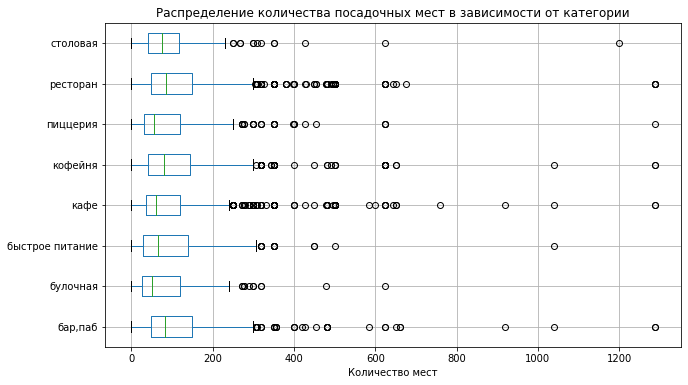

In [38]:
# Строим диаграмму размаха значений в столбце seats
df.boxplot(column='seats', by='category',vert=False , figsize=(10, 6))

# Добавляем заголовок и метки оси
plt.title('Распределение количества посадочных мест в зависимости от категории')
plt.xlabel('Количество мест')
plt.ylabel('')
plt.suptitle('')
# Выводим график
plt.show()

Аномально высокие значения есть практически во всех категориях, чтобы исключить очевидные выбросы, отфильтруем значения в поле `seats`, убрав значения нулевого процентиля и выше 95 (включительно).

In [39]:
# Для начала сохраним значение 95-го процентиля в отдельную переменную
quan95 = df['seats'].quantile(0.95)
quan95

307.0

In [40]:
# Также сохраним значение нулевого процентиля
quan_zero = df['seats'].quantile(0)
quan_zero

0.0

Сохраним новый датафрейм, который не будет равен нулевому процентилю и будет меньше 95 процентиля.

In [41]:
new_df = df.loc[(df['seats'] != quan_zero) & (df['seats'] < quan95)]

Построим распределение количества посадочных мест в зависимости от категорий

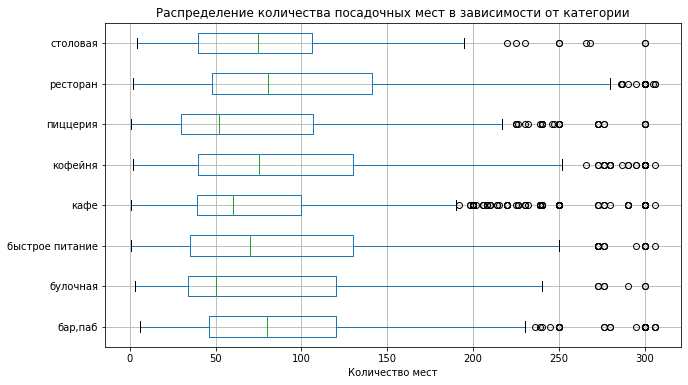

In [42]:
# Строим диаграмму размаха значений в столбце seats по новому датафрейму
new_df.boxplot(column='seats', by='category',vert=False , figsize=(10, 6))

# Добавляем заголовок и метки оси
plt.title('Распределение количества посадочных мест в зависимости от категории')
plt.xlabel('Количество мест')
plt.ylabel('')
plt.suptitle('')
# Выводим график
plt.show()

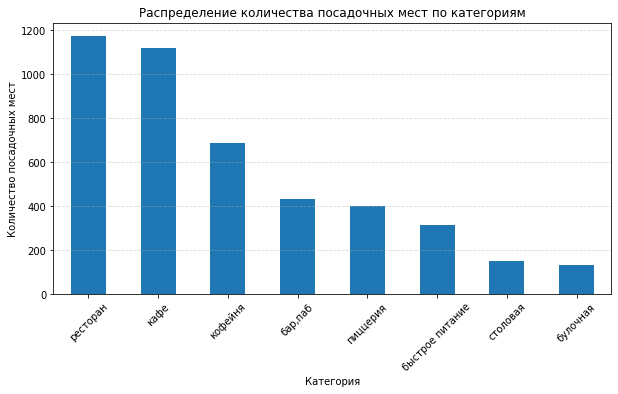

In [43]:
# Построим график столбчатой диаграммы
cat_cnt_seats = new_df.groupby('category')['seats'].count().sort_values(ascending = False)
cat_cnt_seats.plot(kind='bar',
               title=f'Распределение количества посадочных мест по категориям',
               legend=False,
               ylabel='Количество посадочных мест',
               xlabel='Категория',
               rot=45,
               figsize=(10, 5))

# Добавляем только вертикальные линии сетки
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.grid(axis='x', b=False)  # Отключаем горизонтальные линии
    

# Выводим график
plt.show()

Отфильтровав наш датафрейм мы получили более релевантные данные, хотя ресторан и кафе с количетсво посадочных мест более 1000 до сих пор кажется нереальным.

In [44]:
median_seats = new_df.groupby('category')['seats'].mean().sort_values(ascending=False)
median_seats.round()

category
ресторан           102.0
бар,паб             96.0
кофейня             93.0
быстрое питание     91.0
булочная            86.0
столовая            84.0
кафе                82.0
пиццерия            81.0
Name: seats, dtype: float32

Медианные значения в категориях не сильно отличаются друг от друга, что не соответствует обыденному формату заведений.

**Промежуточный вывод:**
- Практически все категории имеют аномально-высокие значения, при этом нет четких признаков появления подобных выбросов, сложно выявить релевантную медиану по количеству мест в каждой категории. 

---

### Исследуем рейтинг заведений. 
Визуализируем распределение средних рейтингов по категориям заведений. 

Ответим на вопрос:
- Сильно ли различаются усреднённые рейтинги для разных типов общепита?

In [45]:
df['rating'].unique()

array([5. , 4.5, 4.6, 4.4, 4.7, 4.8, 4.3, 4.9, 4.2, 4.1, 4. , 3.8, 3.9,
       3.7, 3.6, 2.8, 2.7, 3.1, 1.5, 2. , 1.4, 3.3, 3.5, 3.2, 2.9, 3. ,
       3.4, 2.3, 2.2, 2.5, 2.6, 1.7, 1. , 1.1, 2.4, 1.3, 1.2, 2.1, 1.8,
       1.9, 1.6], dtype=float32)

In [46]:
avg_rating_cat = df.groupby('category')['rating'].mean()
avg_rating_cat.sort_values(ascending=False)

category
бар,паб            4.387712
пиццерия           4.301264
ресторан           4.290357
кофейня            4.277282
булочная           4.268359
столовая           4.211429
кафе               4.123886
быстрое питание    4.050249
Name: rating, dtype: float32

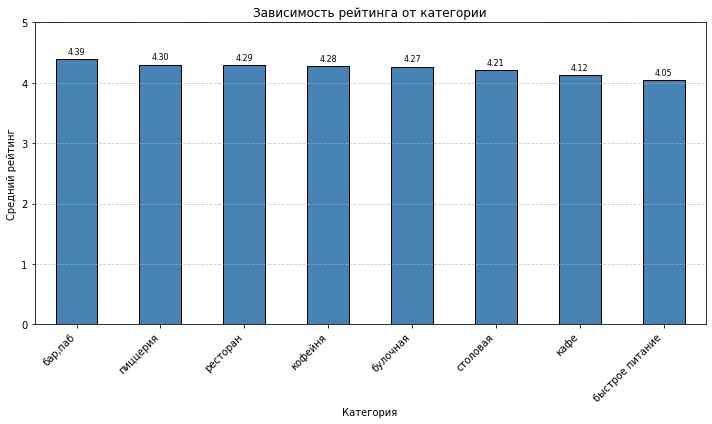

In [47]:
# Группируем данные и считаем средний рейтинг
cat_rating = df.groupby('category')['rating'].mean().sort_values(ascending=False)

# Создаем график
plt.figure(figsize=(10, 6))
ax = cat_rating.plot(
    kind='bar',
    color='steelblue',
    title='Зависимость рейтинга от категории',
    edgecolor='black'
)

# Настраиваем оси
plt.xlabel('Категория')
plt.ylabel('Средний рейтинг')
plt.ylim(0, 5)  # Устанавливаем пределы по оси Y

# Добавляем сетку
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Улучшаем читаемость
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Добавляем метки на столбцах
for i, v in enumerate(cat_rating):
    plt.text(i, v + 0.05, f'{v:.2f}', ha='center', va='bottom', fontsize=8)

# Показываем график
plt.show()

Проверим, отличается ли рейтинг по категориям в зависимости от административного округа.

In [48]:
# Создадим сводную таблицу
pivot = df.pivot_table(values='rating', index='category', columns='district', aggfunc='mean')
pivot 

district,Восточный административный округ,Западный административный округ,Северный административный округ,Северо-Восточный административный округ,Северо-Западный административный округ,Центральный административный округ,Юго-Восточный административный округ,Юго-Западный административный округ,Южный административный округ
category,,,,,,,,,
"бар,паб",4.315094,4.398000,4.327941,4.190476,4.391304,4.486264,4.200000,4.350000,4.276471
булочная,4.168000,4.264865,4.253846,4.342857,4.283333,4.372000,4.038462,4.155556,4.340000
быстрое питание,4.043662,3.969355,3.975862,4.032927,3.950000,4.234483,3.925373,4.086885,4.101176
кафе,4.098162,4.075732,4.180851,4.053532,4.047826,4.302371,4.047873,4.036975,4.093939
кофейня,4.282857,4.195333,4.291710,4.216981,4.325807,4.336449,4.225842,4.283333,4.232824
пиццерия,4.269444,4.288733,4.292208,4.255882,4.337500,4.411504,4.185454,4.340625,4.258904
ресторан,4.186875,4.257339,4.289947,4.209890,4.292661,4.416120,4.156552,4.225595,4.212376
столовая,4.232500,4.112500,4.217073,4.082500,4.188889,4.315152,4.104000,4.241177,4.261364


**Промежуточный вывод:**
- Все категории заведений имеют средний рейтинг выше 4, кроме точек быстрого питания в Западном, Северо-Западном и Юго-Восточном административном округе, рейтинг данных заведений ниже 4.
- Категория `бар, паб` имеет наибольший средний рейтинг по всем районам Москвы и составляет - 4,39.

---

### Изучим, с какими данными показывают самую сильную корреляцию рейтинги заведений. 
Построим и визуализируем матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберем самую сильную связь и проверьте её.

In [49]:
# Построим матрицу корреляции 
correlation_matrix = df.corr()
correlation_matrix

,rating,chain,seats,middle_avg_bill,middle_coffee_cup,is_24_7
rating,1.000000,-0.014954,0.021025,0.183238,0.100447,-0.098250
chain,-0.014954,1.000000,0.041974,-0.128766,-0.028641,0.034480
seats,0.021025,0.041974,1.000000,0.082429,-0.025197,-0.038794
middle_avg_bill,0.183238,-0.128766,0.082429,1.000000,NaN,-0.022908
middle_coffee_cup,0.100447,-0.028641,-0.025197,NaN,1.000000,0.149045
is_24_7,-0.098250,0.034480,-0.038794,-0.022908,0.149045,1.000000


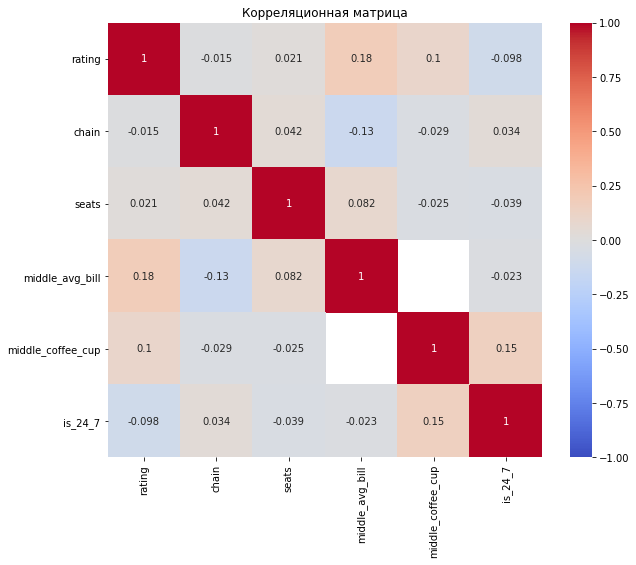

In [50]:
# Визуализируем матрицу
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm',
            vmin=-1, 
            vmax=1,
            square=True)
plt.title('Корреляционная матрица')
plt.show()

Видим, что сильной корреляции между значениями не обнаржено. Построим отдельно матрицу корреляции для столбца rating.

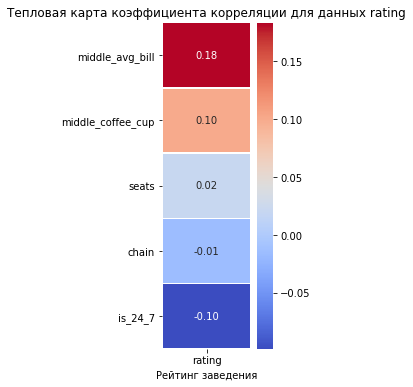

In [51]:
# Задаем размер области построения
plt.figure(figsize=(2, 6))

# Сохраняем матрицу корреляции rating с другими признаками клиента
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data_heatmap,
            annot=True, # Отображаем численные значения в ячейках карты
            fmt='.2f', # Форматируем значения корреляции: два знака после точки
            cmap='coolwarm', # Устанавливаем цветовую гамму от красного (макс. значение) к синему
            linewidths=0.5, # Форматируем линию между ячейками карты
            cbar=True # Отображение цветовой шаклы
           )

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента корреляции для данных rating')
plt.xlabel('Рейтинг заведения')

# Выводим график
plt.show()

Наибольшая корреляция значений `rating` со значениями среднего чека `middle_avg_bill` - `0.18`, хотя данное значение не говорит о сильной зависимости показателей, проверим детальней гипотезу их зависимости.

<AxesSubplot:title={'center':'Зависимость рейтинга от среднего чека'}, xlabel='rating', ylabel='middle_avg_bill'>

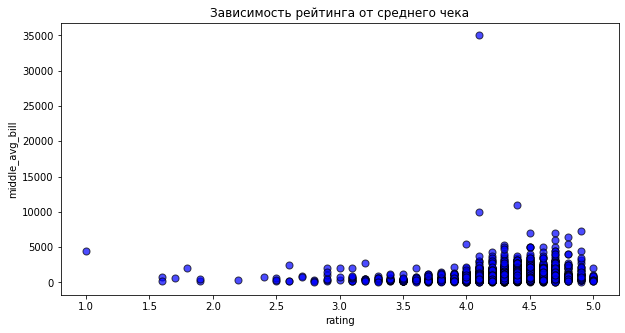

In [52]:
# Построим диаграмму рассеяния sacatter
df.plot(
    kind='scatter',      # Определяет, что тип графика — scatterplot
    x='rating',  # Данные по оси X
    y='middle_avg_bill',  # Данные по оси Y
    alpha=0.7,           # Прозрачность точек
    color='blue',        # Цвет точек
    edgecolor='black',   # Цвет контура точек
    s=50,                # Размер точек
    figsize = (10,5),
    title='Зависимость рейтинга от среднего чека' # Заголовок графика
) 

Прямой зависимости между рейтингом и средним чеком в заведениях не обноружено.

**Промежуточный вывод:**

- Существенной зависимости между значениями в столбцах датафрейма не обноружено.

---

### Сгруппируем данные по названиям заведений и найдем топ-15 популярных сетей в Москве. 
Для них посчитаем значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. Выясним, к какой категории заведений они относятся. 

In [53]:
#Находим количество заведений для каждого имени, а также средний рейтинг 
cnt_name = df.groupby('name').agg(
    id_count=('id', 'count'),  
    rating_mean=('rating', 'mean')  
).sort_values(by='id_count', ascending=False).reset_index()
#Выводим топ-15 заведений по кол-ву точек
top15 = cnt_name.head(15)
top15

,name,id_count,rating_mean
0,КАФЕ,189,3.880952
1,ШОКОЛАДНИЦА,120,4.177500
2,ДОМИНО'С ПИЦЦА,77,4.171429
3,ДОДО ПИЦЦА,74,4.286487
4,ONE PRICE COFFEE,72,4.069445
5,ЯНДЕКС ЛАВКА,69,3.872464
6,COFIX,65,4.075385
7,PRIME,50,4.116000
8,ХИНКАЛЬНАЯ,44,4.322727
9,ШАУРМА,43,3.909302


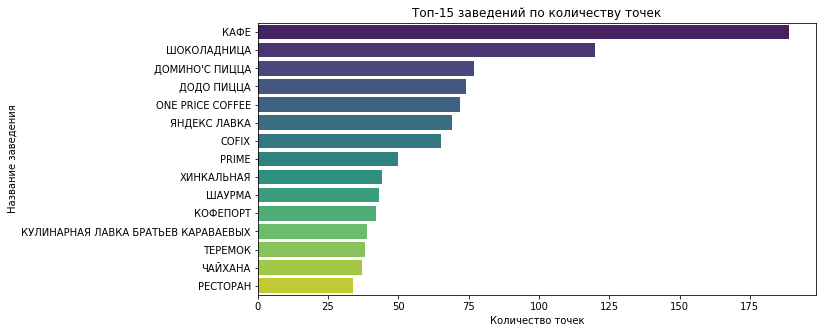

In [54]:
# Выведем гистаграмму топ-15 заведений по количеству точек
plt.figure(figsize=(10, 5))
sns.barplot(data=top15, x='id_count', y='name', palette='viridis')
plt.title('Топ-15 заведений по количеству точек')
plt.xlabel('Количество точек')
plt.ylabel('Название заведения')

plt.show()

In [55]:
#Средний рейтинг по всем заведениям
df['rating'].mean().round(1)

4.2

In [56]:
#Находим к каким категориям относятся сети из ТОП-15
cnt_name = df.groupby(['name', 'category']).agg(
    id_count=('id', 'count'),  
    rating_mean=('rating', 'mean')  
).sort_values(by='id_count', ascending=False).reset_index()
#Выводим название сети и категорию
top15 = cnt_name.head(15)
top15[['name', 'category']]

,name,category
0,КАФЕ,кафе
1,ШОКОЛАДНИЦА,кофейня
2,ДОМИНО'С ПИЦЦА,пиццерия
3,ДОДО ПИЦЦА,пиццерия
4,ONE PRICE COFFEE,кофейня
5,ЯНДЕКС ЛАВКА,ресторан
6,COFIX,кофейня
7,PRIME,ресторан
8,КОФЕПОРТ,кофейня
9,КУЛИНАРНАЯ ЛАВКА БРАТЬЕВ КАРАВАЕВЫХ,кафе


**Промежуточный вывод:**

- На первой позиции по количеству точек заведение со странным названием "Кафе", имеющуя в своей сети 159 заведений, средний рейтинг сети 3.8, что ниже среднего рейтинга по всем категориям заведений, который соответствует 4.2, это говорит о том, что есть моменты в обслуживании или приготовлении блюд, которые не устраивают посетителей, нужно детальней ознакомиться с отзывами данной сети, чтобы узнать более точную причину низкого рейтинга.
- Из ТОП-15 сетей, только у "Додо Пиццы", "Хинкальной", "Кулинарной лавки братьев Караваевых", "Ресторана" рейтинг выше среднего.
- Преобладающее большинство заведений из ТОП-15 это рестораны и кофейни.

---

### Изучим вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. 
Также проанализируем цены в Центральном административном округе и других. Выясним, как удалённость от центра влияет на цены в заведениях.

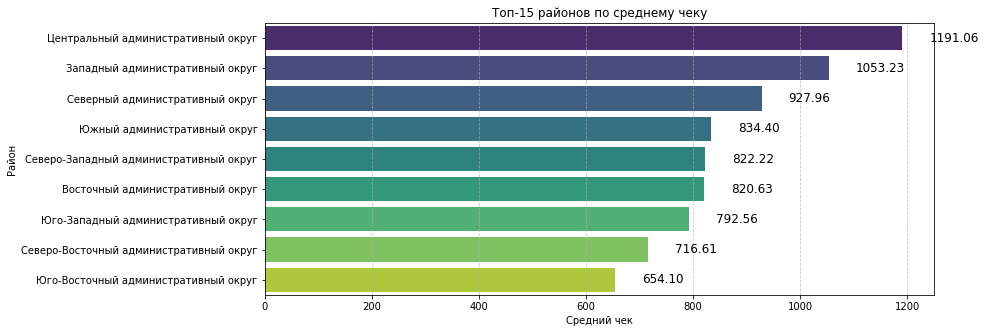

In [57]:
# Вычисляем средние значения среднего чека по административным округам Москвы
var_check = df.groupby('district')['middle_avg_bill'].mean().sort_values(ascending=False).head(15)

# Создаем DataFrame для визуализации
plot_data = pd.DataFrame({'district': var_check.index, 'average_bill': var_check.values})

# Создаем график
plt.figure(figsize=(12, 5))
sns.barplot(data=plot_data, x='average_bill', y='district', palette='viridis')

# Настройка оформления
plt.title('Топ-15 районов по среднему чеку')
plt.xlabel('Средний чек')
plt.ylabel('Район')
plt.grid(axis='x', linestyle='--', alpha=0.7)  # добавляем сетку по оси X

# Добавляем значения над столбцами, данный код нашел в интернете, так как хотелось добавить значения к столбцам
for i, v in enumerate(plot_data['average_bill']):
    plt.text(v + 50, i, f'{v:.2f}', va='center', ha='left', fontsize=12)

plt.show()

In [58]:
# Создадим сводную таблицу среднего чека в зависимости от категории заведения и административного округа
pivot_chek_reg = df.pivot_table(values='middle_avg_bill', index='district', columns='category', aggfunc='mean')
pivot_chek_reg.round(0).astype(int)

category,"бар,паб",булочная,быстрое питание,кафе,кофейня,пиццерия,ресторан,столовая
district,,,,,,,,
Восточный административный округ,1209,264,832,608,486,701,1221,365
Западный административный округ,1306,723,432,827,694,905,1478,565
Северный административный округ,1573,625,327,724,496,723,1313,338
Северо-Восточный административный округ,987,516,436,674,433,579,1025,325
Северо-Западный административный округ,1057,200,295,798,441,683,1236,299
Центральный административный округ,1480,1238,532,765,795,1105,1561,320
Юго-Восточный административный округ,1043,375,479,589,263,562,932,289
Юго-Западный административный округ,996,557,411,595,382,787,1117,312
Южный административный округ,1079,458,377,697,505,663,1393,291


Text(0.5, 1.0, 'Корреляция среднего чека между административным округом и категории')

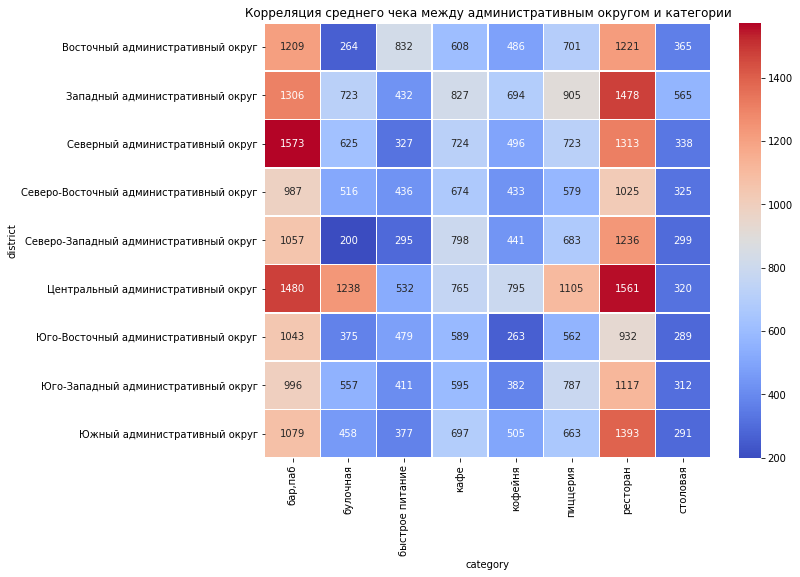

In [59]:
#Построим матрицу корреляции для наглядности результатов
plt.figure(figsize=(10, 8))
sns.heatmap(data=pivot_chek_reg, annot=True, fmt='.0f', linewidths=0.5, cmap='coolwarm')
plt.title('Корреляция среднего чека между административным округом и категории')

**Промежуточный вывод:**
- Центральный административный округ(ЦАО) является лидером по самому высокому среднему чеку - 1 191 рубль, далее идет Западный (ЗАО) и Северный (САО) административные округа со средним чеком - 1 053 рубля и 928 рублей соответственно.
- Категории с самым высоким чеком в тройке лидеров, это катеория "бар, паб", имеющая средний чек в ЦАО - 1480 рублей и в САО - 1573 рубля, а также категория "Рестораны", имеющая средний чек в ЦАО - 1561 рубль и в ЗАО - 1478 рублей.
- Категория "Ресторан" и "Бар,паб" имеют стабильно высокие чеки во всех административных округах, наиболее низкий чек у "Столовых".

## Итоговый вывод и рекомендации


**Основной вывод**

- Рынок общественного питания Москвы характеризуется четкой структурой с доминированием кафе, ресторанов и кофеен. Центральный округ является главным гастрономическим центром города. Сетевой формат занимает существенную долю рынка, особенно в сегментах кофеен и пиццерий.

- Несмотря на общую высокую оценку заведений (рейтинг выше 4), есть существенные различия между районами и категориями. Высокие чеки наблюдаются в ресторанах и барах ЦАО, при этом столовые демонстрируют наименьший средний чек.

- Обнаруженные аномалии в данных о посадочных местах требуют дополнительной проверки и очистки. 
Слабая корреляция между показателями говорит о том, что успех заведения зависит от множества факторов, не связанных напрямую с ценой или местоположением.

**Реомендации**

По выбору локации:
- Избегать ЦАО из-за высокой конкуренции (2242 заведения);
- Рассмотреть САО и ЮАО, как перспективные районы с потенциалом роста;
- Учитывать специфику района: в ЗАО и СЗАО избегать формата фастфуда из-за низкого рейтинга, хотя возможно наоборот на фоне "слабых" конкурентов выстроить фастфуд-заведение с высокими стандартами обслуживания и качества блюд.

Формат заведения:

- Предпочесть рестораны и кофейни, как наиболее популярные форматы;
- Избегать формата “Столовая” из-за низкого среднего чека, но рассмотреть открытие заведения данного формата в районах с наличием пром-зон и крупных предприятий, где вероятна большая концентрация людей, которым важнее быстро покушать за приемлимые деньги;
- Рассмотреть формат “Бар/Паб”: высокий рейтинг (4.39) и средний чек.

Ценообразование:
- ЦАО: ориентироваться на средний чек 1191 руб;
- ЗАО и САО: целевой чек 1050-930 руб;
- Для ресторанов и кафе ориентироваться на средний чек не менее 500 рублей за блюдо.

Приоритеты:
- Инвестировать в районы с потенциалом роста (САО, ЮАО);
- Развивать успешные форматы (рестораны, кофейни, бары);
- Контролировать качество на всех этапах: этикет обслуживающего персонала, приготовлении блюд на кухне, условия работы труда для поваров, качетсво продуктов, которые поступают на кухню, все критерии важны для поддержания высокого имиджа заведения, а в следствии стабильного высокого рейтинга точки или сети.